In [85]:
import perceval as pv 
from perceval.components import BS, PS
from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
from perceval.utils import BasicState, DensityMatrix
import numpy as np
from collections import Counter
pv.__version__

'0.11.2'

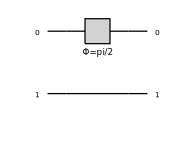

In [86]:
qc = pv.Circuit(2)
phase_shifter = comp.PS(np.pi/2) # phi = pi/2
# qc.add(0, BS.H())
qc.add(0, phase_shifter)
# qc.add(0, BS.H())
# qc.add(1, phase_shifter)
pv.pdisplay(qc, skin=SymbSkin())

In [87]:
sv = pv.StateVector([1,0]) # From the paper

dm_ini = DensityMatrix.from_svd(sv)
# pv.pdisplay(dm_ini)
print(dm_ini)

circuit = qc

stepper = pv.simulators.Stepper(pv.backends.SLOSBackend())
stepper.set_circuit(circuit)
# sv = pv.StateVector(sv)

# we make the state vector evolve through all components of the circuit - here there is only one component
stepIndex = 0

print(stepIndex, ')\t', sv, '\n')

for r, c in circuit:
    sv = stepper.apply(sv, r, c)
    stepIndex += 1
    print(stepIndex, ')\t', sv, '\n')


1.00+0.00j*|1,0><1,0|
0 )	 |1,0> 

1 )	 I*|1,0> 



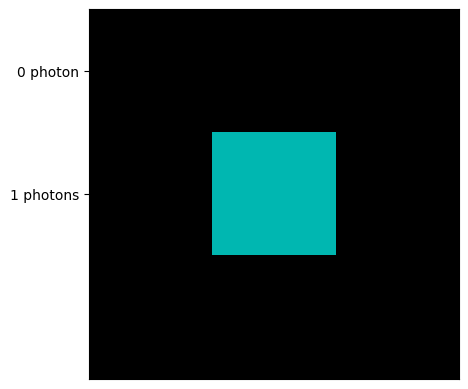

In [88]:

dm_fin = DensityMatrix.from_svd(sv)
pv.pdisplay(dm_fin)


final state vector I*|1,0>
1.00+0.00j*|1,0><1,0|


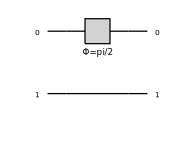

In [89]:

print("final state vector", sv)
print(dm_fin)
pv.pdisplay(circuit, skin=SymbSkin())

In [ ]:
def fidelity(in_state, out_state):
    # return pv.algorithm.Analyzer(p, states)
    d_in = DensityMatrix.from_svd(in_state).mat.toarray()
    d_out = DensityMatrix.from_svd(out_state).mat.toarray()
    return np.trace(np.matmul(d_in,d_out))


sv_in = pv.StateVector([1,0]) # From the paper
# sv_out = pv.StateVector([1,0]) # From the paper
qc = pv.Circuit(1)
phase_shifter = comp.PS(np.pi/2) # phi = pi/2
# qc.add(0, BS.H())
qc.add(0, phase_shifter)
fidelity(sv_in, sv_out)


(1+0j)

In [128]:
np.random.rand(1,12)*np.pi*2

array([[5.70707706, 1.58350937, 1.86723068, 1.96364392, 3.7988183 ,
        4.69676042, 0.00613657, 0.65972991, 2.72763223, 2.04006351,
        1.12824327, 5.57457917]])